# Regresión logística



In [12]:
import matplotlib
%matplotlib inline

from sklearn.linear_model    import LogisticRegression
from sklearn.datasets        import make_circles, make_blobs
from sklearn.datasets        import make_moons
from sklearn.datasets        import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics         import confusion_matrix

from matplotlib              import pyplot as plt

import pandas as pd
import numpy as np

from numpy import dot

## Ejercicios

In [10]:
def agrega_bias(X):
    n,d = X.shape
    u = np.ones((n,1))
    return np.hstack((u,X))

def estandariza(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

def normaliza(X):
    rg = np.amin(X,axis=0) - np.amax(X,axis=0)
    return (X+X.min(axis=0))/rg

def loglikelihood(H,y,th):
    return (-np.dot(y,np.log(H)) - np.dot((1-y),np.log(1-H)))

def sigmoide(z):
    return 1/(1 + np.exp(-z))

def score(th,X):
    return sigmoide(np.dot(X,th))

def gradiente(w,X,y):
    h = sigmoide(np.dot(X,w))
    z = h.T - y
    gr = np.dot(X.T, z.T)
    return gr
    
def grad_desc(X,y,iters, a=0.01,t=100, tol=1e-4):
    #gr = lambda w, X, y: dot(X.T, (sigmoide(w.T,X.T) - y).T)
    n, d = X.shape
    pesos = np.random.ranf((1,d))
    w = pesos[-1]
    #print(pesos)
    h  = sigmoide(np.dot(X,w))
    j  = loglikelihood(h,y,w)
    costos = [j]
    for i in range(iters):
        gr = gradiente(w,X,y)
        w -= a*gr
        pesos  = np.vstack((pesos,w))
        h  = sigmoide(np.dot(X,w))
        j  = loglikelihood(h,y,w)
        costos.append(j)
        if(i%t==0 or j < tol):
            print('{0}:{1}'.format(i,j))
        if(j<tol):
            break
    return w, pesos, costos


### 1. Círculos

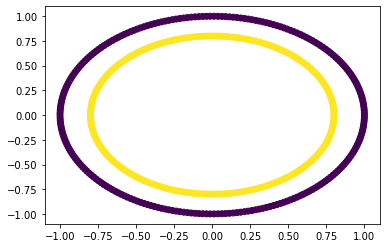

In [15]:
C,c = make_circles(500, random_state=1234) 

plt.scatter(C[:,0],C[:,1],c=c)

In [16]:
Xt, Xp, yt, yp = train_test_split(C, c)
wf, W, J = grad_desc(Xt,yt,15000,0.05, t=1000)

0:266.7554277676387
1000:259.6842023386849
2000:259.6842023386849
3000:259.6842023386849
4000:259.6842023386849
5000:259.6842023386849
6000:259.6842023386849
7000:259.6842023386849
8000:259.6842023386849
9000:259.6842023386849
10000:259.6842023386849
11000:259.6842023386849
12000:259.6842023386849
13000:259.6842023386849
14000:259.6842023386849


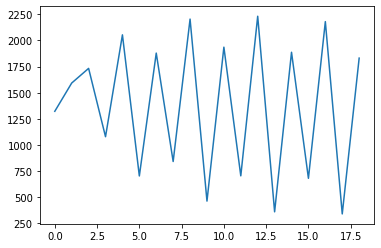

In [25]:
plt.plot(J[1:20])

In [26]:
Xu = agrega_bias(Xp)
h = sigmoide(np.dot(Xu,wf))
S = loglikelihood(h, Xp, wf)

ValueError: shapes (125,2) and (125,) not aligned: 2 (dim 1) != 125 (dim 0)

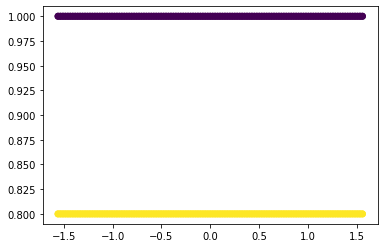

In [38]:
Xu = np.zeros_like(C)
Xu[:,0], Xu[:,1] = np.arctan(C[:,1]/C[:,0]), np.linalg.norm(C,axis=1)
plt.scatter(Xu[:,0], Xu[:,1], c=c)

In [39]:
Xu = agrega_bias(Xu)
Ct, Cp, ct, cp = train_test_split(Xu, c)
wf, W, J = grad_desc(Ct,ct,1000,0.1)

0:2316.1085512099557
100:874.3994282381933
200:0.08533415144710797
300:0.03547342008180642
400:0.022409277799964353
500:0.016382065082931885
600:0.012911849906964116
700:0.010656136324011242
800:0.009072349692325773
900:0.007899250580406726


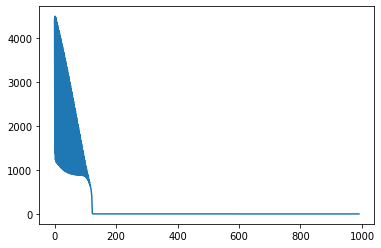

In [43]:
plt.plot(J[10:])

Verificamos 

In [44]:
h = sigmoide(np.dot(Cp,wf))
S = loglikelihood(h,cp, wf)
print("Erorr {0}".format(S/2))

print(confusion_matrix(np.round(h), cp))

Erorr 0.0008991742718816655
[[74  0]
 [ 0 51]]


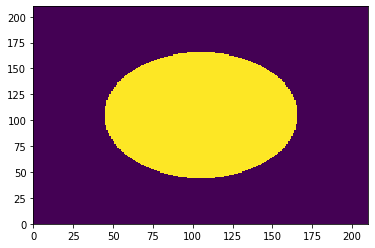

In [45]:
P = np.arange(-1.05,1.05,0.01)
Q = np.arange(-1.05,1.05,0.01)
Z = np.zeros((len(P),len(Q)))
def trans(p,q):
    try:
        return np.array([1,np.arctan(q/p),np.linalg.norm( np.array([p,q]) )])
    except:
        if(p==0):
            return np.array( [1,0,0] )
        
for p in range(len(P)):
    for q in range(len(Q)):
        x,y = P[p], Q[q]
        Z[p,q] = np.round(int(sigmoide( np.dot(trans(x,y),wf) )) )
plt.pcolor(Z)


### 2 Iris

In [13]:
datos_iris = load_iris()
print(datos_iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 3. Dataset Sonar

In [50]:
columnas = [i for i in range(60)]+ ['clasif']
sonar_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data", 
                            header=0)
sonar_dataset.columns = columnas

In [51]:
data = np.array(sonar_dataset[columnas[:-1]])
#data = normaliza(data)
#print(data)
clsf = np.array([1 if c=='M' else 0 for c in sonar_dataset['clasif']])

In [52]:
Xt, Xs, yt, ys = train_test_split(data,clsf)

In [54]:
wf, W, J = grad_desc(Xt,yt,20000,0.01)

0:150.55106349872136
100:60.27327379053563
200:55.61730026536253
300:52.73868220472453
400:50.65494300565857
500:49.026059379342556
600:47.69201389736489
700:46.56392040281192
800:45.58713722013852
900:44.72576150523446
1000:43.955060129978655
1100:43.25736583543046
1200:42.61968111405811
1300:42.032202060964195
1400:41.487371255065135
1500:40.979250087459405
1600:40.50309143966909
1700:40.055041936644805
1800:39.631930195341084
1900:39.23111343946673
2000:38.85036452217534
2100:38.487787428131625
2200:38.141753176826064
2300:37.81085056021753
2400:37.493847816774505
2500:37.189662472365185
2600:36.89733735336138
2700:36.616021317213246
2800:36.344953626954464
2900:36.08345116861331
3000:35.83089790759584
3100:35.58673612420732
3200:35.35045907491974
3300:35.121604805384266
3400:34.899750900946
3500:34.684510005796795
3600:34.475525976645045
3700:34.272470563596485
3800:34.07504053179177
3900:33.88295515368122
4000:33.695954014701236
4100:33.51379508534816
4200:33.336253020822745
4300:

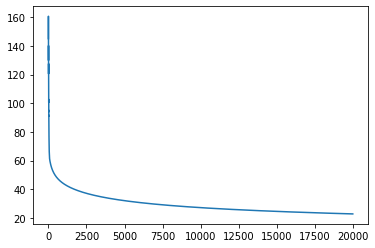

In [55]:
plt.plot(J[10:])

In [57]:
h = sigmoide(dot(Xs, wf))
S = loglikelihood(h, ys, wf )
print("Error total {}".format(S))
for y, yh in zip(ys, h):
    print("real {} : yh {} ".format(y,np.round(yh)))

Error total 64.75955477321524
real 0 : yh 1.0 
real 1 : yh 1.0 
real 0 : yh 0.0 
real 1 : yh 1.0 
real 0 : yh 1.0 
real 0 : yh 0.0 
real 0 : yh 0.0 
real 1 : yh 1.0 
real 0 : yh 0.0 
real 1 : yh 1.0 
real 1 : yh 1.0 
real 1 : yh 1.0 
real 0 : yh 1.0 
real 0 : yh 0.0 
real 1 : yh 1.0 
real 1 : yh 1.0 
real 1 : yh 1.0 
real 1 : yh 1.0 
real 1 : yh 0.0 
real 1 : yh 0.0 
real 1 : yh 1.0 
real 1 : yh 1.0 
real 0 : yh 0.0 
real 0 : yh 0.0 
real 0 : yh 0.0 
real 1 : yh 0.0 
real 1 : yh 1.0 
real 0 : yh 0.0 
real 0 : yh 1.0 
real 1 : yh 0.0 
real 1 : yh 1.0 
real 0 : yh 0.0 
real 0 : yh 1.0 
real 0 : yh 0.0 
real 1 : yh 1.0 
real 1 : yh 1.0 
real 1 : yh 1.0 
real 1 : yh 1.0 
real 0 : yh 0.0 
real 0 : yh 1.0 
real 1 : yh 1.0 
real 0 : yh 0.0 
real 1 : yh 1.0 
real 1 : yh 1.0 
real 0 : yh 0.0 
real 1 : yh 1.0 
real 1 : yh 0.0 
real 1 : yh 0.0 
real 0 : yh 1.0 
real 0 : yh 0.0 
real 1 : yh 0.0 
real 1 : yh 1.0 


In [59]:
np.round(h)

array([1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1.])

In [33]:
confusion_matrix(ys, np.round(h))

array([[15, 10],
       [ 6, 21]])

```Python
def pca(datos, dimensiones=2):
    m,n = datos.shape
    D = datos[:]; D-= datos.mean(axis=0)
    R = cov(D, rowvar=False)
    evals, evecs = eig(R)
    idx = argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    evecs = evecs[:, :dimensiones]
    return dot(evecs.T, D.T).T, evals, evecs

data_pca, Z, V = pca(data, 16)

Xt, Xs, yt, ys = train_test_split(data_pca,clsf)
wf, W, J = grad_desc(Xt,yt,40000,0.1)
```

# Tarea

Ajustar un modelo logístico para los siguientes problemas.

1. Dataset de iris: Escoger la proyección que mejor convenga para clasificar a los ejemplos en 1: Iris setosa, 0: No setosa



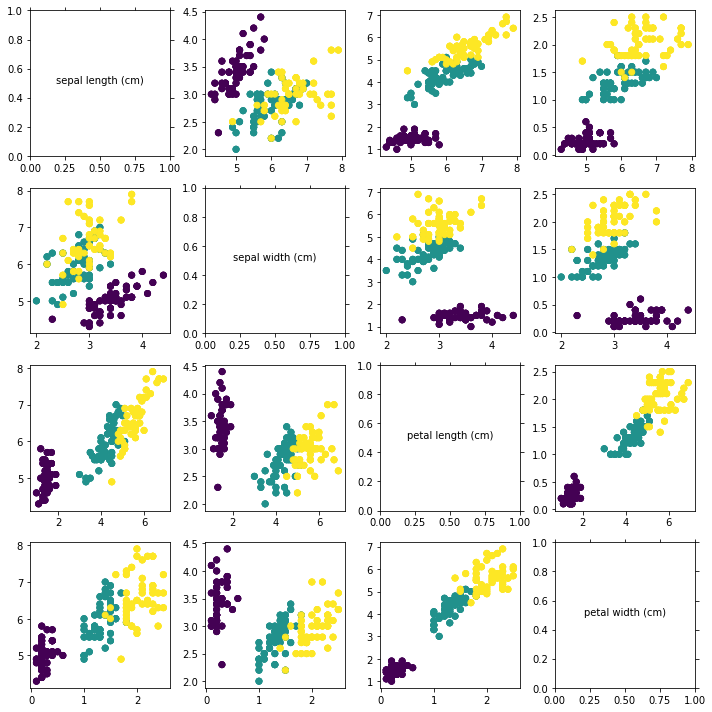

In [14]:
X, y = datos_iris['data'], datos_iris['target']
attrb = datos_iris.feature_names

fig, axes = plt.subplots(4,4, figsize=(10,10))
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i,j]
        if (i==j):
            ax.tick_params(
                axis='both',which='both',
                bottom='off',top='off',
                labelbottom='off',
                left='off',right='off',
                labelleft='off'
            )
            ax.text(0.5,0.5,attrb[i],horizontalalignment='center')
        else:
            ax.scatter(X[:,i],X[:,j],c=y)
            ax.scatter(X[:,i],X[:,j],c=y)
            ax.scatter(X[:,i],X[:,j],c=y)
fig.tight_layout()
plt.show()

2. Medias lunas: Ajustar un modelo logístico al dataset de las medias lunas (con los parámetros que se especifican) para clasificar a los puntos como pertenecientes a la media luna superior o inferior.

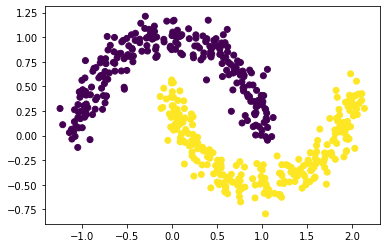

In [6]:
M,y = make_moons(n_samples=500, noise=0.1, random_state=1234 )
plt.scatter(M[:,0], M[:,1], c=y)